<a href="https://colab.research.google.com/github/prog815/progGA/blob/master/%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генетический поиск параметров линейного уравнения

Проект "Генетическая оптимизация"

https://github.com/prog815/progGA

А.В. Енин

г. Оренбург

25.08.2020



# Описание

В настоящем расчете показываем использование библиотеки генетической оптимизации.



# Загружаем библиотеку

In [1]:
! pip install git+https://github.com/prog815/progGA


  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-m6z3nthv
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-m6z3nthv
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3481 sha256=9c0e36f7acc2fd82b6f60c02aec676c2039622b4d3b121a0c0c21b7b86b3dafc
  Stored in directory: /tmp/pip-ephem-wheel-cache-eej9ul4a/wheels/9c/7a/cc/d1ffa9ccaa42befda21d63d0e01c942a0add5854c37e0bd2ff
Successfully built progGA
  Found existing installation: progGA 0.0.6
    Uninstalling progGA-0.0.6:
      Successfully uninstalled progGA-0.0.6


In [2]:
from progGA import ListGenetic

# Определяем данные по линейной функции

In [3]:
import numpy as np

# количество примеров для генерации

N = 1000

# входы модели (две переменные)

X = np.random.randn(N)
Y = np.random.randn(N)

# параметры модели

A = 2
B = 4
C = 6

# генерим примеры выхода модели

Z = A*X+B*Y+C

# добавляем шум

Z += np.random.randn(N)*0.1

# Запускаем генетический поиск

## функция оптимизации

In [4]:
def getQualityMethod(a,b,c):
    z = a*X+b*Y+c
    return -np.sum(np.abs(Z-z))

## создание модели генетического поиска

In [5]:
modelGA = ListGenetic(pop_size=20,
                        a=np.arange(-10,10),
                        b=np.arange(-10,10),
                        c=np.arange(-10,10),
                        quality_method=getQualityMethod)

## запуск генетического поиска

In [6]:
modelGA.fit(1000)


1 {'quality': -15838.307049044995, 'a': -10, 'b': -10, 'c': -1}
2 {'quality': -8850.610576315725, 'a': -7, 'b': -1, 'c': 2}
3 {'quality': -9303.65062731181, 'a': 2, 'b': 9, 'c': -3}
4 {'quality': -3563.956689618324, 'a': 2, 'b': 7, 'c': 3}
5 {'quality': -9339.080722229372, 'a': 3, 'b': 9, 'c': -3}
6 {'quality': -17258.860253792765, 'a': -10, 'b': -1, 'c': -10}
7 {'quality': -4222.329331599319, 'a': -1, 'b': 7, 'c': 3}
8 {'quality': -5696.708351991483, 'a': -1, 'b': -1, 'c': 2}
9 {'quality': -6288.825243782994, 'a': -1, 'b': -2, 'c': 2}
10 {'quality': -5276.545292148713, 'a': -1, 'b': -1, 'c': 3}
11 {'quality': -5255.161973530498, 'a': -1, 'b': 9, 'c': 3}
12 {'quality': -7273.8307396309065, 'a': -6, 'b': 7, 'c': 3}
13 {'quality': -10198.325842347898, 'a': -6, 'b': 9, 'c': -2}
14 {'quality': -3563.956689618324, 'a': 2, 'b': 7, 'c': 3}
15 {'quality': -5276.545292148713, 'a': -1, 'b': -1, 'c': 3}
16 {'quality': -4834.297816220874, 'a': -1, 'b': 7, 'c': 2}
17 {'quality': -7951.098967982262,

## выводим результаты

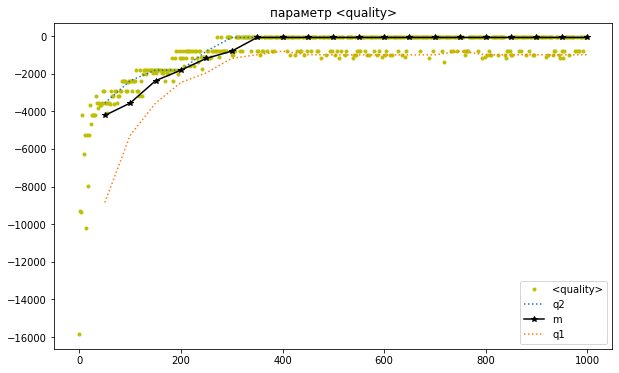

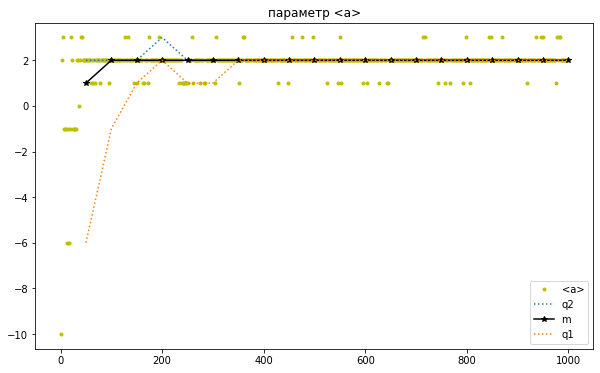

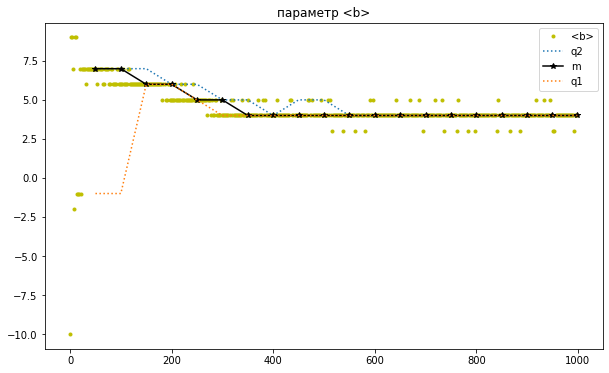

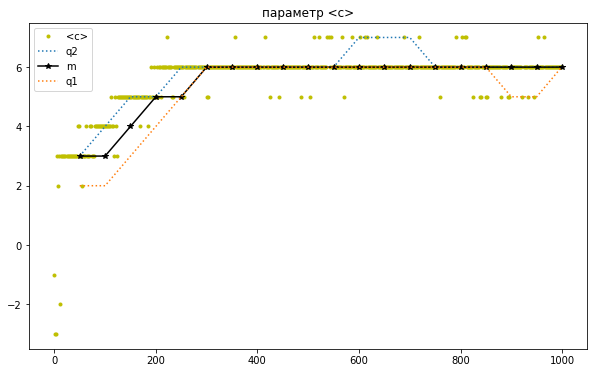

In [7]:
modelGA.plot_hist_new(('quality','a','b','c'))